# PROGRAMMING ASSIGNMENT 3
# Patrick McElroy

1. DATA PREPARATION

In [40]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay

In [2]:
data = pd.read_csv('dataframe.csv')
Data = data.loc[:,'feature_0':'feature_70']

df = pd.DataFrame(Data)
df.head()

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_61,feature_62,feature_63,feature_64,feature_65,feature_66,feature_67,feature_68,feature_69,feature_70
0,1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [3]:
X = df.loc[:,'feature_1':'feature_70']
y = df.loc[:,'feature_0']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

2. NEURAL NETWORK MODELS
3. TRAINING THE RECCOMENDATION SYSTEM
4. EVALUATION

FIRST MODEL

In [4]:
np.random.seed(123)
rand_indices = np.random.permutation(488)
train_indices = rand_indices[0:300]
valid_indices = rand_indices[300:488]

x_val = X_train.iloc[valid_indices, :]
y_val = y_train.iloc[valid_indices]

x_tr = X_train.iloc[train_indices, :]
y_tr = y_train.iloc[train_indices]

print('Shape of x_tr: ' + str(x_tr.shape))
print('Shape of y_tr: ' + str(y_tr.shape))
print('Shape of x_val: ' + str(x_val.shape))
print('Shape of y_val: ' + str(y_val.shape))

Shape of x_tr: (300, 70)
Shape of y_tr: (300,)
Shape of x_val: (188, 70)
Shape of y_val: (188,)


In [8]:
from keras.layers import Dense, Dropout
from keras.models import Sequential
from keras.wrappers.scikit_learn import KerasClassifier
from keras import optimizers

model = Sequential()
model.add(Dense(10, input_dim = 70, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(5, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation = 'sigmoid'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 10)                710       
_________________________________________________________________
dropout_3 (Dropout)          (None, 10)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 5)                 55        
_________________________________________________________________
dropout_4 (Dropout)          (None, 5)                 0         
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 6         
Total params: 771
Trainable params: 771
Non-trainable params: 0
_________________________________________________________________


In [9]:
model.compile(loss = 'binary_crossentropy', optimizer='adam', metrics = ['accuracy'])

history = model.fit(x_tr, y_tr, batch_size=64, epochs=10, validation_data=(x_val, y_val))

Train on 300 samples, validate on 188 samples
Epoch 1/10
300/300 [==============================] - 1s 2ms/step - loss: 0.7359 - accuracy: 0.5067 - val_loss: 0.7200 - val_accuracy: 0.5372
Epoch 2/10
300/300 [==============================] - 0s 42us/step - loss: 0.7063 - accuracy: 0.5133 - val_loss: 0.7157 - val_accuracy: 0.5532
Epoch 3/10
300/300 [==============================] - 0s 50us/step - loss: 0.7096 - accuracy: 0.5100 - val_loss: 0.7129 - val_accuracy: 0.5585
Epoch 4/10
300/300 [==============================] - 0s 44us/step - loss: 0.7081 - accuracy: 0.5367 - val_loss: 0.7110 - val_accuracy: 0.5426
Epoch 5/10
300/300 [==============================] - 0s 40us/step - loss: 0.6887 - accuracy: 0.5433 - val_loss: 0.7099 - val_accuracy: 0.5319
Epoch 6/10
300/300 [==============================] - 0s 38us/step - loss: 0.6967 - accuracy: 0.5700 - val_loss: 0.7088 - val_accuracy: 0.5319
Epoch 7/10
300/300 [==============================] - 0s 42us/step - loss: 0.6982 - accuracy: 0.5

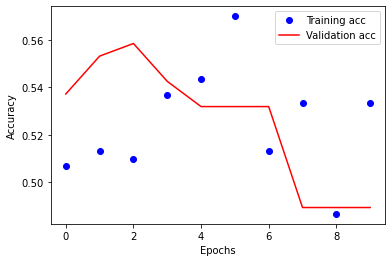

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [11]:
history = model.fit(X_train, y_train, batch_size=64, epochs=10)

Epoch 1/10
488/488 [==============================] - 0s 85us/step - loss: 0.6987 - accuracy: 0.5430
Epoch 2/10
488/488 [==============================] - 0s 46us/step - loss: 0.6966 - accuracy: 0.5266
Epoch 3/10
488/488 [==============================] - 0s 40us/step - loss: 0.6954 - accuracy: 0.5246
Epoch 4/10
488/488 [==============================] - 0s 31us/step - loss: 0.6962 - accuracy: 0.5266
Epoch 5/10
488/488 [==============================] - 0s 33us/step - loss: 0.6951 - accuracy: 0.5266
Epoch 6/10
488/488 [==============================] - 0s 30us/step - loss: 0.6943 - accuracy: 0.5184
Epoch 7/10
488/488 [==============================] - 0s 29us/step - loss: 0.6901 - accuracy: 0.5307
Epoch 8/10
488/488 [==============================] - 0s 31us/step - loss: 0.6930 - accuracy: 0.5123
Epoch 9/10
488/488 [==============================] - 0s 31us/step - loss: 0.6830 - accuracy: 0.5594
Epoch 10/10
488/488 [==============================] - 0s 32us/step - loss: 0.6905 - accura

In [12]:
loss_and_acc = model.evaluate(X_test, y_test)
print('loss = ' + str(loss_and_acc[0]))
print('accuracy = ' + str(loss_and_acc[1]))

122/122 [==============================] - 0s 100us/step
loss = 0.6944519154361037
accuracy = 0.5081967115402222


In [34]:
prediction = model.predict_classes(X_test)
print(classification_report(prediction, y_test))

              precision    recall  f1-score   support

           0       0.87      0.50      0.64       107
           1       0.12      0.47      0.19        15

    accuracy                           0.50       122
   macro avg       0.49      0.49      0.41       122
weighted avg       0.78      0.50      0.58       122



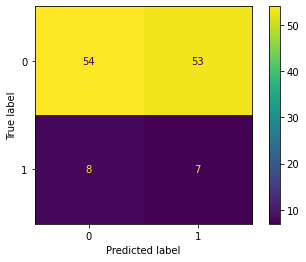

In [44]:
conf = confusion_matrix(prediction, y_test)
disp = ConfusionMatrixDisplay(conf)
disp.plot()
plt.show()

SECOND MODEL WITH HYPERPARAMETER TUNING

In [15]:
def classifier(neurons1, neurons2, optimizer):
    model = Sequential()
    model.add(Dense(neurons1, input_dim = 70, activation = 'relu'))
    model.add(Dropout(0.2))
    model.add(Dense(neurons2, activation = 'relu'))
    model.add(Dense(1, activation = 'sigmoid'))
    model.compile(loss = 'binary_crossentropy', optimizer=optimizer, metrics = ['accuracy'])
    return model

In [16]:
Model = KerasClassifier(build_fn=classifier, epochs = 10, verbose = 1)

param_grid = {'neurons1': [20, 10, 5],
              'neurons2': [10, 5],
             'batch_size': [100, 50, 20, 10],
             'optimizer': ['sgd', 'adam', 'RMSprop']}

gs=GridSearchCV(estimator=Model, param_grid=param_grid, n_jobs=1, cv=3) 
gs.fit(X_train, y_train)

Epoch 1/10
325/325 [==============================] - 0s 1ms/step - loss: 0.9541 - accuracy: 0.5200
Epoch 2/10
325/325 [==============================] - 0s 41us/step - loss: 0.9153 - accuracy: 0.5200
Epoch 3/10
325/325 [==============================] - 0s 31us/step - loss: 0.8883 - accuracy: 0.5200
Epoch 4/10
325/325 [==============================] - 0s 33us/step - loss: 0.8611 - accuracy: 0.5200
Epoch 5/10
325/325 [==============================] - 0s 37us/step - loss: 0.8265 - accuracy: 0.5200
Epoch 6/10
325/325 [==============================] - 0s 36us/step - loss: 0.8138 - accuracy: 0.5138
Epoch 7/10
325/325 [==============================] - 0s 32us/step - loss: 0.8002 - accuracy: 0.5262
Epoch 8/10
325/325 [==============================] - 0s 36us/step - loss: 0.7832 - accuracy: 0.5138
Epoch 9/10
325/325 [==============================] - 0s 35us/step - loss: 0.7789 - accuracy: 0.5108
Epoch 10/10
163/163 [==============================] - 0s 540us/step
Epoch 1/10
325/325 [===

325/325 [==============================] - 0s 30us/step - loss: 0.6892 - accuracy: 0.5015
Epoch 5/10
325/325 [==============================] - 0s 33us/step - loss: 0.6901 - accuracy: 0.5446
Epoch 6/10
325/325 [==============================] - 0s 34us/step - loss: 0.6887 - accuracy: 0.5292
Epoch 7/10
325/325 [==============================] - 0s 30us/step - loss: 0.6931 - accuracy: 0.5354
Epoch 8/10
325/325 [==============================] - 0s 32us/step - loss: 0.6894 - accuracy: 0.5508
Epoch 9/10
325/325 [==============================] - 0s 33us/step - loss: 0.6864 - accuracy: 0.5354
Epoch 10/10
163/163 [==============================] - 0s 529us/step
Epoch 1/10
325/325 [==============================] - 0s 1ms/step - loss: 0.7014 - accuracy: 0.4954
Epoch 2/10
325/325 [==============================] - 0s 33us/step - loss: 0.6942 - accuracy: 0.5200
Epoch 3/10
325/325 [==============================] - 0s 29us/step - loss: 0.6838 - accuracy: 0.5600
Epoch 4/10
325/325 [==============

325/325 [==============================] - 0s 21us/step - loss: 0.7381 - accuracy: 0.4523
Epoch 8/10
325/325 [==============================] - 0s 23us/step - loss: 0.7287 - accuracy: 0.4831
Epoch 9/10
325/325 [==============================] - 0s 22us/step - loss: 0.7236 - accuracy: 0.4831
Epoch 10/10
163/163 [==============================] - 0s 509us/step
Epoch 1/10
325/325 [==============================] - 0s 1ms/step - loss: 0.7743 - accuracy: 0.5231
Epoch 2/10
325/325 [==============================] - 0s 21us/step - loss: 0.7518 - accuracy: 0.5200
Epoch 3/10
325/325 [==============================] - 0s 21us/step - loss: 0.7334 - accuracy: 0.5138
Epoch 4/10
325/325 [==============================] - 0s 21us/step - loss: 0.7118 - accuracy: 0.5015
Epoch 5/10
325/325 [==============================] - 0s 23us/step - loss: 0.6984 - accuracy: 0.5446
Epoch 6/10
325/325 [==============================] - 0s 20us/step - loss: 0.6789 - accuracy: 0.5723
Epoch 7/10
325/325 [==============

163/163 [==============================] - 0s 511us/step
Epoch 1/10
325/325 [==============================] - 0s 986us/step - loss: 0.7063 - accuracy: 0.5385
Epoch 2/10
325/325 [==============================] - 0s 17us/step - loss: 0.7102 - accuracy: 0.4985
Epoch 3/10
325/325 [==============================] - 0s 18us/step - loss: 0.7145 - accuracy: 0.4862
Epoch 4/10
325/325 [==============================] - 0s 18us/step - loss: 0.7059 - accuracy: 0.5231
Epoch 5/10
325/325 [==============================] - 0s 19us/step - loss: 0.7033 - accuracy: 0.5323
Epoch 6/10
325/325 [==============================] - 0s 18us/step - loss: 0.7051 - accuracy: 0.5292
Epoch 7/10
325/325 [==============================] - 0s 16us/step - loss: 0.7097 - accuracy: 0.4985
Epoch 8/10
325/325 [==============================] - 0s 19us/step - loss: 0.7005 - accuracy: 0.5508
Epoch 9/10
325/325 [==============================] - 0s 17us/step - loss: 0.7032 - accuracy: 0.5108
Epoch 10/10
163/163 [============

325/325 [==============================] - 0s 32us/step - loss: 0.7039 - accuracy: 0.4677
Epoch 3/10
325/325 [==============================] - 0s 32us/step - loss: 0.7067 - accuracy: 0.4954
Epoch 4/10
325/325 [==============================] - 0s 30us/step - loss: 0.6989 - accuracy: 0.5415
Epoch 5/10
325/325 [==============================] - 0s 30us/step - loss: 0.6950 - accuracy: 0.5415
Epoch 6/10
325/325 [==============================] - 0s 30us/step - loss: 0.6861 - accuracy: 0.5723
Epoch 7/10
325/325 [==============================] - 0s 28us/step - loss: 0.6785 - accuracy: 0.5969
Epoch 8/10
325/325 [==============================] - 0s 30us/step - loss: 0.6832 - accuracy: 0.5569
Epoch 9/10
325/325 [==============================] - 0s 30us/step - loss: 0.6820 - accuracy: 0.5754
Epoch 10/10
163/163 [==============================] - 0s 519us/step
Epoch 1/10
326/326 [==============================] - 0s 1ms/step - loss: 0.7006 - accuracy: 0.5245
Epoch 2/10
326/326 [==============

325/325 [==============================] - 0s 36us/step - loss: 0.6938 - accuracy: 0.4954
Epoch 6/10
325/325 [==============================] - 0s 34us/step - loss: 0.6860 - accuracy: 0.5508
Epoch 7/10
325/325 [==============================] - 0s 33us/step - loss: 0.6886 - accuracy: 0.5538
Epoch 8/10
325/325 [==============================] - 0s 36us/step - loss: 0.6884 - accuracy: 0.5200
Epoch 9/10
325/325 [==============================] - 0s 33us/step - loss: 0.6858 - accuracy: 0.5354
Epoch 10/10
163/163 [==============================] - 0s 516us/step
Epoch 1/10
326/326 [==============================] - 0s 1ms/step - loss: 0.7034 - accuracy: 0.4969
Epoch 2/10
326/326 [==============================] - 0s 36us/step - loss: 0.6973 - accuracy: 0.4877
Epoch 3/10
326/326 [==============================] - 0s 33us/step - loss: 0.6973 - accuracy: 0.4816
Epoch 4/10
326/326 [==============================] - 0s 33us/step - loss: 0.6916 - accuracy: 0.4877
Epoch 5/10
326/326 [==============

325/325 [==============================] - 0s 29us/step - loss: 0.6899 - accuracy: 0.5200
Epoch 9/10
325/325 [==============================] - 0s 28us/step - loss: 0.6931 - accuracy: 0.5015
Epoch 10/10
163/163 [==============================] - 0s 519us/step
Epoch 1/10
326/326 [==============================] - 0s 1000us/step - loss: 0.8302 - accuracy: 0.5153
Epoch 2/10
326/326 [==============================] - 0s 29us/step - loss: 0.7799 - accuracy: 0.5307
Epoch 3/10
326/326 [==============================] - 0s 28us/step - loss: 0.7683 - accuracy: 0.5245
Epoch 4/10
326/326 [==============================] - 0s 28us/step - loss: 0.7634 - accuracy: 0.4939
Epoch 5/10
326/326 [==============================] - 0s 29us/step - loss: 0.7335 - accuracy: 0.5153
Epoch 6/10
326/326 [==============================] - 0s 32us/step - loss: 0.7223 - accuracy: 0.5307
Epoch 7/10
326/326 [==============================] - 0s 27us/step - loss: 0.7185 - accuracy: 0.5123
Epoch 8/10
326/326 [===========

163/163 [==============================] - 0s 518us/step
Epoch 1/10
326/326 [==============================] - 0s 1ms/step - loss: 0.6977 - accuracy: 0.5153
Epoch 2/10
326/326 [==============================] - 0s 29us/step - loss: 0.6968 - accuracy: 0.4816
Epoch 3/10
326/326 [==============================] - 0s 30us/step - loss: 0.6922 - accuracy: 0.5153
Epoch 4/10
326/326 [==============================] - 0s 27us/step - loss: 0.6952 - accuracy: 0.4939
Epoch 5/10
326/326 [==============================] - 0s 29us/step - loss: 0.6925 - accuracy: 0.5184
Epoch 6/10
326/326 [==============================] - 0s 31us/step - loss: 0.6957 - accuracy: 0.4877
Epoch 7/10
326/326 [==============================] - 0s 29us/step - loss: 0.6908 - accuracy: 0.5521
Epoch 8/10
326/326 [==============================] - 0s 29us/step - loss: 0.6906 - accuracy: 0.5215
Epoch 9/10
326/326 [==============================] - 0s 29us/step - loss: 0.6888 - accuracy: 0.5521
Epoch 10/10
162/162 [==============

326/326 [==============================] - 0s 82us/step - loss: 0.7163 - accuracy: 0.5215
Epoch 4/10
326/326 [==============================] - 0s 82us/step - loss: 0.7039 - accuracy: 0.5307
Epoch 5/10
326/326 [==============================] - 0s 77us/step - loss: 0.6937 - accuracy: 0.5521
Epoch 6/10
326/326 [==============================] - 0s 76us/step - loss: 0.6862 - accuracy: 0.5337
Epoch 7/10
326/326 [==============================] - 0s 73us/step - loss: 0.6866 - accuracy: 0.5399
Epoch 8/10
326/326 [==============================] - 0s 75us/step - loss: 0.6801 - accuracy: 0.5675
Epoch 9/10
326/326 [==============================] - 0s 78us/step - loss: 0.6765 - accuracy: 0.5828
Epoch 10/10
162/162 [==============================] - 0s 535us/step
Epoch 1/10
325/325 [==============================] - 0s 1ms/step - loss: 0.6990 - accuracy: 0.5046
Epoch 2/10
325/325 [==============================] - 0s 68us/step - loss: 0.6919 - accuracy: 0.5446
Epoch 3/10
325/325 [==============

326/326 [==============================] - 0s 63us/step - loss: 0.6999 - accuracy: 0.4540
Epoch 7/10
326/326 [==============================] - 0s 64us/step - loss: 0.7008 - accuracy: 0.4540
Epoch 8/10
326/326 [==============================] - 0s 65us/step - loss: 0.6974 - accuracy: 0.4693
Epoch 9/10
326/326 [==============================] - 0s 64us/step - loss: 0.6990 - accuracy: 0.4356
Epoch 10/10
162/162 [==============================] - 0s 538us/step
Epoch 1/10
325/325 [==============================] - 0s 2ms/step - loss: 0.7182 - accuracy: 0.5046
Epoch 2/10
325/325 [==============================] - 0s 77us/step - loss: 0.7015 - accuracy: 0.5077
Epoch 3/10
325/325 [==============================] - 0s 68us/step - loss: 0.6978 - accuracy: 0.5015
Epoch 4/10
325/325 [==============================] - 0s 72us/step - loss: 0.6934 - accuracy: 0.5108
Epoch 5/10
325/325 [==============================] - 0s 71us/step - loss: 0.6939 - accuracy: 0.5108
Epoch 6/10
325/325 [==============

326/326 [==============================] - 0s 71us/step - loss: 0.6913 - accuracy: 0.5521
Epoch 9/10
326/326 [==============================] - 0s 78us/step - loss: 0.6894 - accuracy: 0.5583
Epoch 10/10
162/162 [==============================] - 0s 573us/step
Epoch 1/10
325/325 [==============================] - 0s 1ms/step - loss: 0.7134 - accuracy: 0.4769
Epoch 2/10
325/325 [==============================] - 0s 64us/step - loss: 0.7089 - accuracy: 0.4615
Epoch 3/10
325/325 [==============================] - 0s 60us/step - loss: 0.7014 - accuracy: 0.4923
Epoch 4/10
325/325 [==============================] - 0s 64us/step - loss: 0.7036 - accuracy: 0.4646
Epoch 5/10
325/325 [==============================] - 0s 61us/step - loss: 0.7052 - accuracy: 0.4585
Epoch 6/10
325/325 [==============================] - 0s 56us/step - loss: 0.6973 - accuracy: 0.4677
Epoch 7/10
325/325 [==============================] - 0s 59us/step - loss: 0.6998 - accuracy: 0.4769
Epoch 8/10
325/325 [==============

162/162 [==============================] - 0s 563us/step
Epoch 1/10
325/325 [==============================] - 0s 1ms/step - loss: 0.7548 - accuracy: 0.4615
Epoch 2/10
325/325 [==============================] - 0s 118us/step - loss: 0.7070 - accuracy: 0.4769
Epoch 3/10
325/325 [==============================] - 0s 123us/step - loss: 0.7027 - accuracy: 0.4677
Epoch 4/10
325/325 [==============================] - 0s 130us/step - loss: 0.7016 - accuracy: 0.4954
Epoch 5/10
325/325 [==============================] - 0s 136us/step - loss: 0.6924 - accuracy: 0.5538
Epoch 6/10
325/325 [==============================] - 0s 136us/step - loss: 0.6901 - accuracy: 0.5169
Epoch 7/10
325/325 [==============================] - 0s 138us/step - loss: 0.6842 - accuracy: 0.5446
Epoch 8/10
325/325 [==============================] - 0s 144us/step - loss: 0.6835 - accuracy: 0.5815
Epoch 9/10
325/325 [==============================] - 0s 135us/step - loss: 0.6851 - accuracy: 0.5415
Epoch 10/10
163/163 [======

325/325 [==============================] - 0s 147us/step - loss: 0.6765 - accuracy: 0.5938
Epoch 7/10
325/325 [==============================] - 0s 149us/step - loss: 0.6690 - accuracy: 0.5938
Epoch 8/10
325/325 [==============================] - 0s 145us/step - loss: 0.6591 - accuracy: 0.6185
Epoch 9/10
325/325 [==============================] - 0s 145us/step - loss: 0.6593 - accuracy: 0.5969
Epoch 10/10
163/163 [==============================] - 0s 565us/step
Epoch 1/10
326/326 [==============================] - 1s 2ms/step - loss: 0.7370 - accuracy: 0.5215
Epoch 2/10
326/326 [==============================] - 0s 140us/step - loss: 0.6950 - accuracy: 0.5337
Epoch 3/10
326/326 [==============================] - 0s 138us/step - loss: 0.6849 - accuracy: 0.5521
Epoch 4/10
326/326 [==============================] - 0s 138us/step - loss: 0.6934 - accuracy: 0.5429
Epoch 5/10
326/326 [==============================] - 0s 146us/step - loss: 0.6725 - accuracy: 0.5828
Epoch 6/10
326/326 [======

325/325 [==============================] - 0s 143us/step - loss: 0.6989 - accuracy: 0.4923
Epoch 3/10
325/325 [==============================] - 0s 137us/step - loss: 0.6929 - accuracy: 0.5138
Epoch 4/10
325/325 [==============================] - 0s 134us/step - loss: 0.6930 - accuracy: 0.5015
Epoch 5/10
325/325 [==============================] - 0s 139us/step - loss: 0.6887 - accuracy: 0.5077
Epoch 6/10
325/325 [==============================] - 0s 176us/step - loss: 0.6828 - accuracy: 0.5815
Epoch 7/10
325/325 [==============================] - 0s 155us/step - loss: 0.6834 - accuracy: 0.5908
Epoch 8/10
325/325 [==============================] - 0s 153us/step - loss: 0.6851 - accuracy: 0.5969
Epoch 9/10
325/325 [==============================] - 0s 144us/step - loss: 0.6749 - accuracy: 0.5969
Epoch 10/10
163/163 [==============================] - 0s 552us/step
Epoch 1/10
325/325 [==============================] - 1s 2ms/step - loss: 0.7168 - accuracy: 0.4954
Epoch 2/10
325/325 [======

325/325 [==============================] - 0s 118us/step - loss: 0.6905 - accuracy: 0.5415
Epoch 5/10
325/325 [==============================] - 0s 123us/step - loss: 0.6939 - accuracy: 0.5108
Epoch 6/10
325/325 [==============================] - 0s 124us/step - loss: 0.6896 - accuracy: 0.4831
Epoch 7/10
325/325 [==============================] - 0s 122us/step - loss: 0.6861 - accuracy: 0.5354
Epoch 8/10
325/325 [==============================] - 0s 126us/step - loss: 0.6881 - accuracy: 0.5477
Epoch 9/10
325/325 [==============================] - 0s 134us/step - loss: 0.6879 - accuracy: 0.5262
Epoch 10/10
163/163 [==============================] - 0s 554us/step
Epoch 1/10
325/325 [==============================] - 0s 1ms/step - loss: 0.6953 - accuracy: 0.4954
Epoch 2/10
325/325 [==============================] - 0s 111us/step - loss: 0.6947 - accuracy: 0.5200
Epoch 3/10
325/325 [==============================] - 0s 115us/step - loss: 0.6934 - accuracy: 0.5262
Epoch 4/10
325/325 [======

325/325 [==============================] - 0s 147us/step - loss: 0.6961 - accuracy: 0.5138
Epoch 7/10
325/325 [==============================] - 0s 123us/step - loss: 0.6906 - accuracy: 0.5292
Epoch 8/10
325/325 [==============================] - 0s 125us/step - loss: 0.6923 - accuracy: 0.5415
Epoch 9/10
325/325 [==============================] - 0s 124us/step - loss: 0.6927 - accuracy: 0.5323
Epoch 10/10
163/163 [==============================] - 0s 551us/step
Epoch 1/10
325/325 [==============================] - 0s 1ms/step - loss: 0.7005 - accuracy: 0.4831
Epoch 2/10
325/325 [==============================] - 0s 118us/step - loss: 0.6990 - accuracy: 0.4985
Epoch 3/10
325/325 [==============================] - 0s 117us/step - loss: 0.6983 - accuracy: 0.4708
Epoch 4/10
325/325 [==============================] - 0s 118us/step - loss: 0.6872 - accuracy: 0.5231
Epoch 5/10
325/325 [==============================] - 0s 123us/step - loss: 0.6838 - accuracy: 0.5477
Epoch 6/10
325/325 [======

GridSearchCV(cv=3,
             estimator=<keras.wrappers.scikit_learn.KerasClassifier object at 0x7fb4f1895240>,
             n_jobs=1,
             param_grid={'batch_size': [100, 50, 20, 10],
                         'neurons1': [20, 10, 5], 'neurons2': [10, 5],
                         'optimizer': ['sgd', 'adam', 'RMSprop']})

In [17]:
print(f"Best accuracy of: {gs.best_score_} with the following parameters: {gs.best_params_}")

Best accuracy of: 0.5716251333554586 with the following parameters: {'batch_size': 10, 'neurons1': 20, 'neurons2': 5, 'optimizer': 'RMSprop'}


In [67]:
best_model = gs.best_estimator_

pred = best_model.predict(X_test)

122/122 [==============================] - 0s 145us/step


In [70]:
print(classification_report(pred, y_test))

              precision    recall  f1-score   support

           0       0.76      0.50      0.60        94
           1       0.22      0.46      0.30        28

    accuracy                           0.49       122
   macro avg       0.49      0.48      0.45       122
weighted avg       0.63      0.49      0.53       122



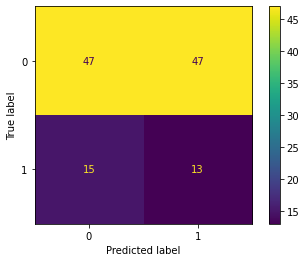

In [71]:
cm = confusion_matrix(pred, y_test)
dis = ConfusionMatrixDisplay(cm)
dis.plot()
plt.show()

5. RANDOM DATA GENERATION AND EVALUATION

In [22]:
num_rows = 610
num_cols = 71

binomial_cols = np.random.binomial(n=1, p=.5, size = (num_rows, 35))
normal_cols = np.random.normal(loc=0.5, scale = 0.25, size = (num_rows, 36))
normal_cols = np.where(normal_cols < 0.5, 0, 1)

data = np.concatenate([binomial_cols, normal_cols], axis = 1)

col_names = [f'feature_{i}' for i in range(num_cols)]

DF = pd.DataFrame(data, columns = col_names)
DF.head()

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_61,feature_62,feature_63,feature_64,feature_65,feature_66,feature_67,feature_68,feature_69,feature_70
0,1,1,1,0,0,0,0,1,1,0,...,0,1,1,1,1,0,1,1,0,1
1,0,1,0,1,0,0,1,1,0,0,...,1,1,0,1,1,0,1,0,1,1
2,0,1,0,1,0,0,1,1,0,0,...,1,0,0,0,0,1,0,1,1,0
3,0,0,1,0,0,0,0,0,0,0,...,0,1,1,1,0,0,0,1,0,0
4,0,1,0,1,1,0,0,0,0,0,...,1,1,0,0,1,1,1,0,1,1


In [23]:
x = DF.loc[:,'feature_1':'feature_70']
Y = DF.loc[:,'feature_0']

x_train, x_test, Y_train, Y_test = train_test_split(x, Y, test_size=0.2)

KERAS NERUAL NETWORK 1

In [55]:
best_model.fit(x_train, Y_train)

Epoch 1/10
488/488 [==============================] - 1s 1ms/step - loss: 0.7333 - accuracy: 0.4713
Epoch 2/10
488/488 [==============================] - 0s 130us/step - loss: 0.6967 - accuracy: 0.4754
Epoch 3/10
488/488 [==============================] - 0s 124us/step - loss: 0.6924 - accuracy: 0.5451
Epoch 4/10
488/488 [==============================] - 0s 131us/step - loss: 0.6863 - accuracy: 0.5799
Epoch 5/10
488/488 [==============================] - 0s 135us/step - loss: 0.6875 - accuracy: 0.5656
Epoch 6/10
488/488 [==============================] - 0s 130us/step - loss: 0.6807 - accuracy: 0.5922
Epoch 7/10
488/488 [==============================] - 0s 138us/step - loss: 0.6781 - accuracy: 0.5963
Epoch 8/10
488/488 [==============================] - 0s 138us/step - loss: 0.6739 - accuracy: 0.5922
Epoch 9/10
488/488 [==============================] - 0s 140us/step - loss: 0.6684 - accuracy: 0.5902
Epoch 10/10
488/488 [==============================] - 0s 140us/step - loss: 0.6598 

In [74]:
y_pred = best_model.predict(x_test)
print(classification_report(y_pred, Y_test))

122/122 [==============================] - 0s 675us/step
              precision    recall  f1-score   support

           0       0.75      0.47      0.58        98
           1       0.15      0.38      0.21        24

    accuracy                           0.45       122
   macro avg       0.45      0.42      0.40       122
weighted avg       0.63      0.45      0.51       122



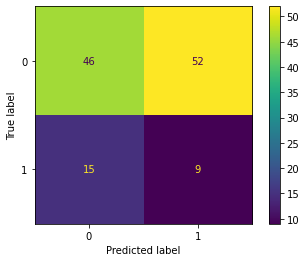

In [75]:
CM = confusion_matrix(y_pred, Y_test)

d = ConfusionMatrixDisplay(CM)
d.plot()
plt.show()